In [28]:
import os
import pandas as pd
import numpy as np
from datetime import timedelta, date
from datetime import datetime
import pandas_datareader.data as web
import re
os.getcwd()

'/home/kentccf/.local/share/Trash/files/transcript'

In [29]:
import zipfile
os.chdir('/home/kentccf')
with zipfile.ZipFile("transcripts.zip","r") as zip_ref:
    zip_ref.extractall("/home/kentccf")

In [30]:
os.chdir('/home/kentccf/transcript')
os.getcwd()

'/home/kentccf/transcript'

In [31]:
folders = os.listdir()

In [32]:
folders[:3]

['.ipynb_checkpoints', 'A', 'AA']

In [35]:
folders[1:]

['A',
 'AA',
 'AAPL',
 'ABC',
 'ABK',
 'ABT',
 'ACE',
 'ACS',
 'ADBE',
 'ADCT',
 'ADI',
 'ADM',
 'ADP',
 'ADSK',
 'AEE',
 'AEP',
 'AES',
 'AET',
 'AFL',
 'AGN',
 'AIG',
 'AIV',
 'ALL',
 'ALTR',
 'AMAT',
 'AMD',
 'AMGN',
 'AMP',
 'AMZN',
 'AN',
 'APA',
 'APC',
 'APCC',
 'APD',
 'APOL',
 'ASD',
 'ASH',
 'ASN',
 'ATI',
 'AV',
 'AVP',
 'AVY',
 'AXP',
 'AYE',
 'AZO',
 'BA',
 'BAC',
 'BAX',
 'BBBY',
 'BBT',
 'BBY',
 'BC',
 'BCR',
 'BDK',
 'BDX',
 'BEN',
 'BHI',
 'BIG',
 'BIIB',
 'BJS',
 'BK',
 'BLL',
 'BMC',
 'BMS',
 'BMY',
 'BNI',
 'BRCM',
 'BSC',
 'BSX',
 'BTU',
 'BXP',
 'C',
 'CA',
 'CAG',
 'CAH',
 'CAT',
 'CB',
 'CBE',
 'CBG',
 'CBH',
 'CBS',
 'CCE',
 'CCU',
 'CEG',
 'CELG',
 'CHK',
 'CI',
 'CINF',
 'CIT',
 'CL',
 'CLX',
 'CMA',
 'CMCSA',
 'CME',
 'CMI',
 'CMS',
 'CNP',
 'CNX',
 'COF',
 'COH',
 'COL',
 'COP',
 'COST',
 'CP',
 'CPB',
 'CPWR',
 'CSC',
 'CSCO',
 'CSX',
 'CTAS',
 'CTL',
 'CTSH',
 'CTX',
 'CTXS',
 'CVG',
 'CVH',
 'CVS',
 'CVX',
 'D',
 'DD',
 'DE',
 'DELL',
 'DF',
 'DG',
 'DGX

In [ ]:
fol = '/home/kentccf/transcript/'+str(folders[0])
os.chdir(fol)
os.getcwd()

In [ ]:
files = os.listdir()

In [ ]:
files[1]

In [ ]:
ticker = re.findall("^[A-Z]*",files[1])[0]
date = re.findall("\d{4}-\d{2}-\d{2}",files[1])[0]

In [ ]:
ticker

In [ ]:
release = datetime.strptime(date, '%Y-%m-%d')
release

In [ ]:
start = release - timedelta(days=1)
end = start + timedelta(days=7)

In [ ]:
data = web.DataReader(ticker,data_source="yahoo",start=start,end=end)[['Adj Close']]
data['ret'] = data.pct_change(periods=1)
vol = data['ret'].std()
ret = ((data['Adj Close'].tail(1)[0] - data['Adj Close'].head(1)[0]) / data['Adj Close'].head(1)[0]) / vol
sp = web.DataReader("^GSPC",data_source="yahoo",start=start,end=end)[['Adj Close']]
sp['ret'] = sp.pct_change(periods=1)
sp_vol = sp['ret'].std()
sp_ret = ((sp['Adj Close'].tail(1)[0] - sp['Adj Close'].head(1)[0]) / sp['Adj Close'].head(1)[0]) / sp_vol
excess_ret = ret - sp_ret

In [ ]:
vol, sp_vol

In [ ]:
ret, sp_ret, excess_ret

In [36]:
ticker_list = []
date_list = []
ret_list = []
direction_list = []
fail_ticker = []
fail_date = []
for i in folders[1:]:
    fol = '/home/kentccf/transcript/'+ i
    os.chdir(fol)
    files = os.listdir()
    for transcript in files:
        ticker = re.findall("^[A-Z]*",transcript)[0]
        str_date = re.findall("\d{4}-\d{2}-\d{2}",transcript)[0]
        
        try:
            release = datetime.strptime(str_date, '%Y-%m-%d')
            start = release - timedelta(days=1)
            end = start + timedelta(days=7)
            data = web.DataReader(ticker,data_source="yahoo",start=start,end=end)[['Adj Close']]
            data['ret'] = data.pct_change(periods=1)
            vol = data['ret'].std()
            ret = ((data['Adj Close'].tail(1)[0] - data['Adj Close'].head(1)[0]) / data['Adj Close'].head(1)[0]) / vol
            #ret = (data['Adj Close'].tail(1)[0] - data['Adj Close'].head(1)[0]) / data['Adj Close'].head(1)[0]
            sp = web.DataReader("^GSPC",data_source="yahoo",start=start,end=end)[['Adj Close']]
            sp['ret'] = sp.pct_change(periods=1)
            sp_vol = sp['ret'].std()
            sp_ret = ((sp['Adj Close'].tail(1)[0] - sp['Adj Close'].head(1)[0]) / sp['Adj Close'].head(1)[0]) / sp_vol
            #sp_ret = (sp['Adj Close'].tail(1)[0] - sp['Adj Close'].head(1)[0]) / sp['Adj Close'].head(1)[0]
            excess_ret = ret - sp_ret
            if excess_ret > 0:
                direction = 'up'
            else:
                direction = 'down'
                
            if excess_ret >= 0 or excess_ret<0:
                ticker_list.append(ticker)
                date_list.append(str_date)
                ret_list.append(excess_ret)
                direction_list.append(direction)
            else:
                continue
        except:
            fail_ticker.append(ticker)
            fail_date.append(str_date)

df = pd.DataFrame({"Ticker":ticker_list,"Date":date_list,"Excess Return":ret_list,"Direction":direction_list})
fail = pd.DataFrame({"Ticker":fail_ticker, "Date":fail_date})

/home/kentccf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars
/home/kentccf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars
/home/kentccf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars
/home/kentccf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars
/home/kentccf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars
/home/kentccf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars
/home/kentccf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars
/home/kentccf/anaconda3/lib/python

/home/kentccf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars
/home/kentccf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars
/home/kentccf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars
/home/kentccf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


In [ ]:
#fail_ticker

In [ ]:
df = pd.DataFrame({"Ticker":ticker_list,"Date":date_list,"Excess Return":ret_list,"Direction":direction_list})
fail = pd.DataFrame({"Ticker":fail_ticker, "Date":date_list})

In [37]:
os.chdir('/home/kentccf/')
os.getcwd()

'/home/kentccf'

In [49]:
df.to_csv("labels_backup.csv")

In [ ]:
len(fail_ticker)

In [ ]:
len(fail_date)

In [ ]:
fail = pd.DataFrame({"Ticker":fail_ticker, "Date":fail_date})

In [50]:
fail.to_csv("failed_backup.csv")

In [ ]:
ticker = "ASN"
start = datetime.strptime("2004-11-02", '%Y-%m-%d')
end = start + timedelta(days=7)
#data = web.DataReader(ticker,data_source="yahoo",start=start,end=end)[['Adj Close']]
#sp = web.DataReader("^GSPC",data_source="yahoo",start=start,end=end)[['Adj Close']]

data = web.DataReader(ticker,data_source="yahoo",start=start,end=end)[['Adj Close']]
data['ret'] = data.pct_change(periods=1)
vol = data['ret'].std()
ret = ((data['Adj Close'].tail(1)[0] - data['Adj Close'].head(1)[0]) / data['Adj Close'].head(1)[0]) / vol
#ret = (data['Adj Close'].tail(1)[0] - data['Adj Close'].head(1)[0]) / data['Adj Close'].head(1)[0]
sp = web.DataReader("^GSPC",data_source="yahoo",start=start,end=end)[['Adj Close']]
sp['ret'] = sp.pct_change(periods=1)
sp_vol = sp['ret'].std()
sp_ret = ((sp['Adj Close'].tail(1)[0] - sp['Adj Close'].head(1)[0]) / sp['Adj Close'].head(1)[0]) / sp_vol
#sp_ret = (sp['Adj Close'].tail(1)[0] - sp['Adj Close'].head(1)[0]) / sp['Adj Close'].head(1)[0]
excess_ret = ret - sp_ret

In [ ]:
if excess_ret >= 0 or excess_ret<0:
    print("true")
else:
    print("false")

In [ ]:
type(excess_ret)

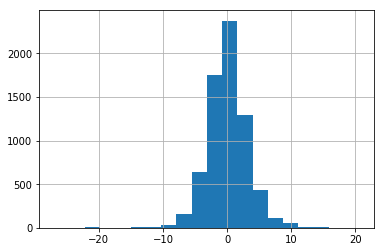

In [48]:
df['Excess Return'].hist(bins=20)